In [1]:
import numpy as np
from keras.models import load_model
import joblib
import matplotlib.pyplot as plt

2024-09-18 15:33:25.037893: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load preprocessed data and the scaler
X_train = np.load("../data/processed/X_train.npy")
y_train = np.load("../data/processed/y_train.npy")
X_val = np.load("../data/processed/X_val.npy")
y_val = np.load("../data/processed/y_val.npy")
X_test = np.load("../data/processed/X_test.npy")
y_test = np.load("../data/processed/y_test.npy")
scaler = joblib.load("../data/processed/scaler.pkl")

# Load the trained models
rnn_model = load_model('../models/rnn_model.keras')
lstm_model = load_model('../models/lstm_model.keras')
gru_model = load_model('../models/gru_model.keras')

### Plotting Loss Curves

6/6 [==============================] - 0s 23ms/step - loss: 6.2628e-04


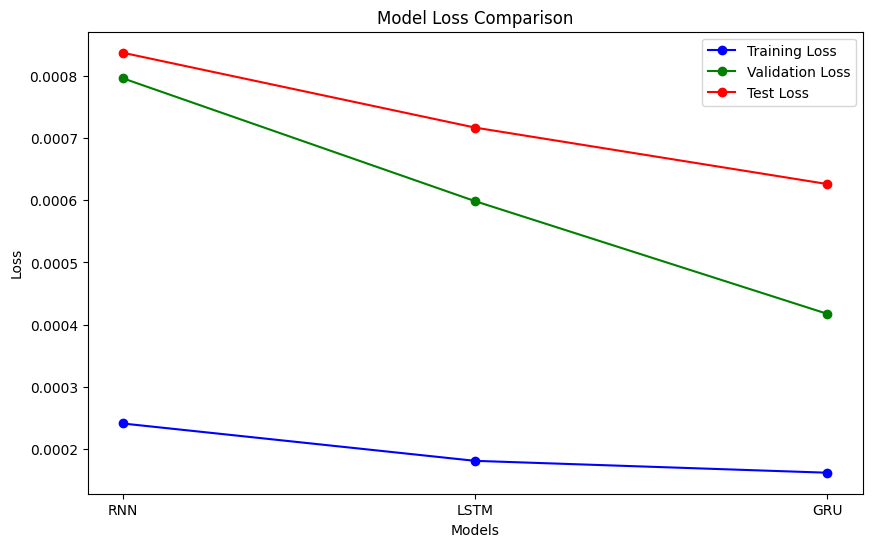

In [3]:
# Loss values for each model
train_loss_rnn = rnn_model.evaluate(X_train, y_train)
val_loss_rnn = rnn_model.evaluate(X_val, y_val)
test_loss_rnn = rnn_model.evaluate(X_test, y_test)

train_loss_lstm = lstm_model.evaluate(X_train, y_train)
val_loss_lstm = lstm_model.evaluate(X_val, y_val)
test_loss_lstm = lstm_model.evaluate(X_test, y_test)

train_loss_gru = gru_model.evaluate(X_train, y_train)
val_loss_gru = gru_model.evaluate(X_val, y_val)
test_loss_gru = gru_model.evaluate(X_test, y_test)

# Plot the loss values
plt.figure(figsize=(10, 6))
models = ['RNN', 'LSTM', 'GRU']
train_losses = [train_loss_rnn, train_loss_lstm, train_loss_gru]
val_losses = [val_loss_rnn, val_loss_lstm, val_loss_gru]
test_losses = [test_loss_rnn, test_loss_lstm, test_loss_gru]

plt.plot(models, train_losses, marker='o', label='Training Loss', color='blue')
plt.plot(models, val_losses, marker='o', label='Validation Loss', color='green')
plt.plot(models, test_losses, marker='o', label='Test Loss', color='red')

plt.title('Model Loss Comparison')
plt.xlabel('Models')
plt.ylabel('Loss')
plt.legend()
plt.savefig('../plots/model_loss_comparison.png')
plt.show()

### Plotting Predicted vs. Actual Stock Prices

6/6 [==============================] - 0s 27ms/step


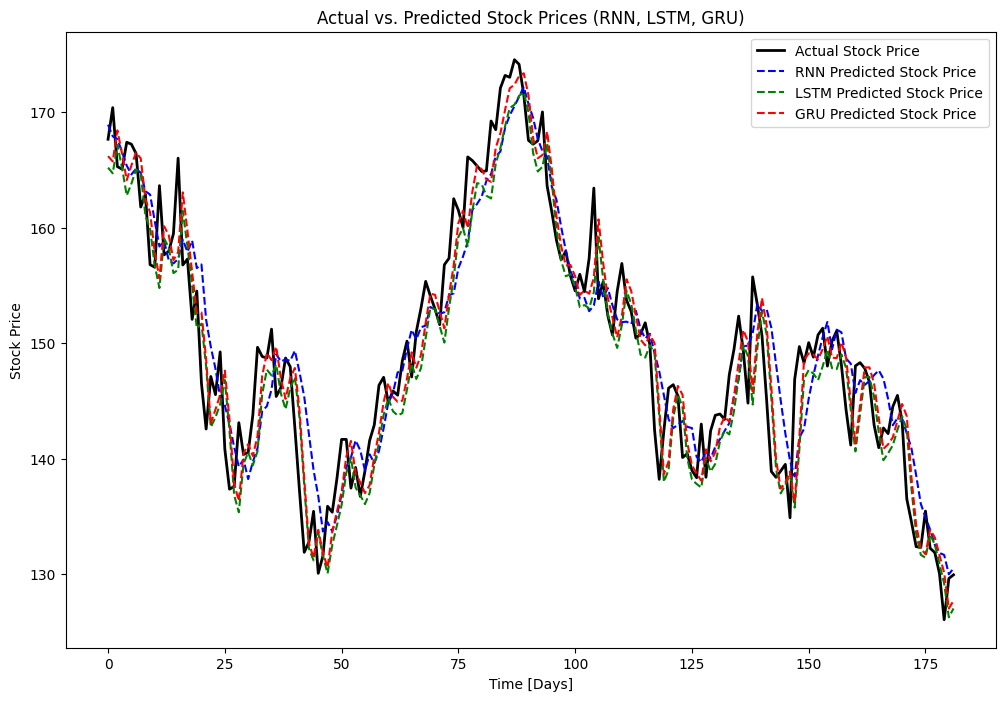

In [4]:
# Make predictions
y_pred_rnn = rnn_model.predict(X_test)
y_pred_lstm = lstm_model.predict(X_test)
y_pred_gru = gru_model.predict(X_test)

# Inverse scale the predictions
y_pred_rnn_rescaled = scaler.inverse_transform(y_pred_rnn)
y_pred_lstm_rescaled = scaler.inverse_transform(y_pred_lstm)
y_pred_gru_rescaled = scaler.inverse_transform(y_pred_gru)

# Inverse transform the actual test values
y_test_rescaled = scaler.inverse_transform(y_test)


# Plot predicted vs. actual values for each model
plt.figure(figsize=(12, 8))

# Plot actual stock prices
plt.plot(y_test_rescaled, label="Actual Stock Price", color='black', linewidth=2)

# Plot predictions for RNN
plt.plot(y_pred_rnn_rescaled, label="RNN Predicted Stock Price", linestyle='--', color='blue')

# Plot predictions for LSTM
plt.plot(y_pred_lstm_rescaled, label="LSTM Predicted Stock Price", linestyle='--', color='green')

# Plot predictions for GRU
plt.plot(y_pred_gru_rescaled, label="GRU Predicted Stock Price", linestyle='--', color='red')

plt.title('Actual vs. Predicted Stock Prices (RNN, LSTM, GRU)')
plt.xlabel('Time [Days]')
plt.ylabel('Stock Price')
plt.legend()
plt.savefig('../plots/actual_vs_pred_rnn_lstm_gru.png')
plt.show()


### Observations

- **GRU** consistently outperformed both RNN and LSTM models across all metrics. It had the lowest **training**, **validation**, and **test losses**, suggesting better generalization to unseen data.

- The **Mean Absolute Error (MAE)** was lowest for the GRU model (2.94), indicating that its predictions were closest to the actual stock prices, while the **R² score** of 0.8858 shows that the GRU model explained a higher proportion of the variance in the stock prices compared to the others.

- The **LSTM** model performed slightly better than the **RNN**, with a lower test loss and higher R², but it still fell short of the GRU model's performance.

### Conclusion

- The **GRU model** demonstrated superior performance in this project, making it the best model for stock price prediction in this case. It is likely the most suitable model to use in further development or deployment of a stock price prediction system.